### Score: `[31]`

Q1. `[11]` good job。

Q2. `[20]` 未上色。

# 1. Global Earthquakes

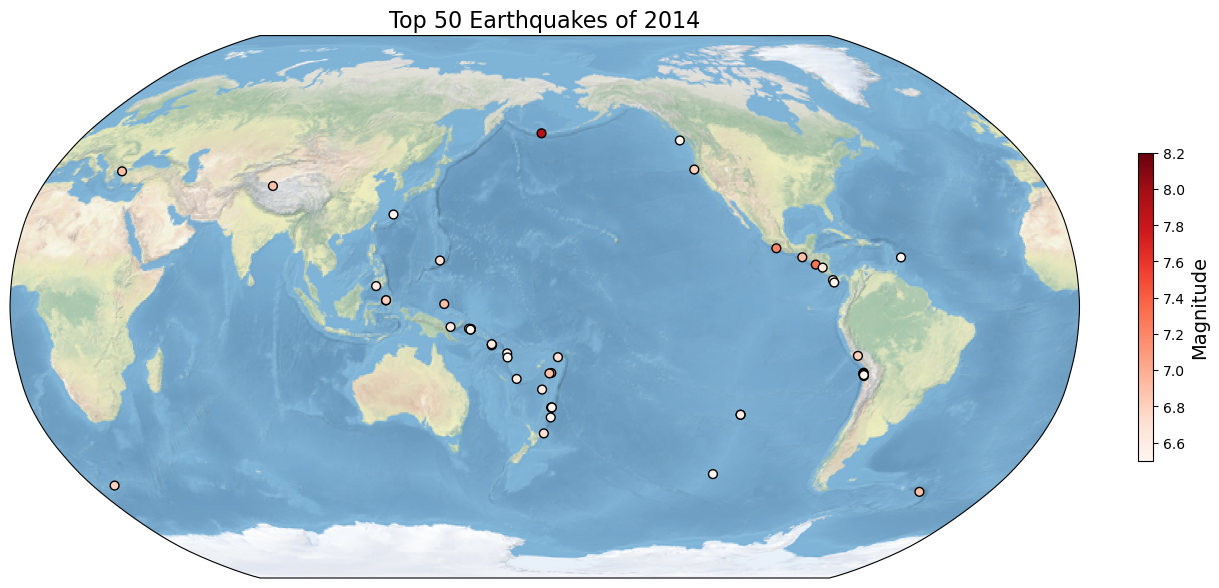

In [133]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  
import cartopy.crs as ccrs  
import cartopy.feature as cfeature  

# 读取数据  
data = pd.read_csv('usgs_earthquakes.csv') 

# 确保 'time' 列是日期格式  
data['time'] = pd.to_datetime(data['time'])  

# 选择2014年的地震数据  
data_2014 = data[data['time'].dt.year == 2014]  

# 选择前50次地震数据  
data_2014 = data_2014.nlargest(50, 'mag')

# 提取经纬度和震级数据
lats = data_2014['latitude']
lons = data_2014['longitude']
mags = data_2014['mag']

# 创建地图和图形
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))

# 添加地图特征
ax.add_feature(cfeature.COASTLINE, edgecolor='none')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

#添加地图背景
ax.stock_img()

# 绘制地震点
scatter = ax.scatter(lons, lats, c=mags, cmap='Reds', edgecolor='black',transform=ccrs.PlateCarree(), s=40)

# 添加颜色条
cbar = plt.colorbar(scatter, orientation='vertical', fraction=0.03, pad=0.05,shrink=0.5)
cbar.set_label('Magnitude',fontsize=14)
cbar.set_ticks(np.arange(6.6,8.3, 0.2))

# 添加标题
plt.title('Top 50 Earthquakes of 2014', fontsize=16, loc='center')
plt.show()

# 2. Explore a netCDF dataset

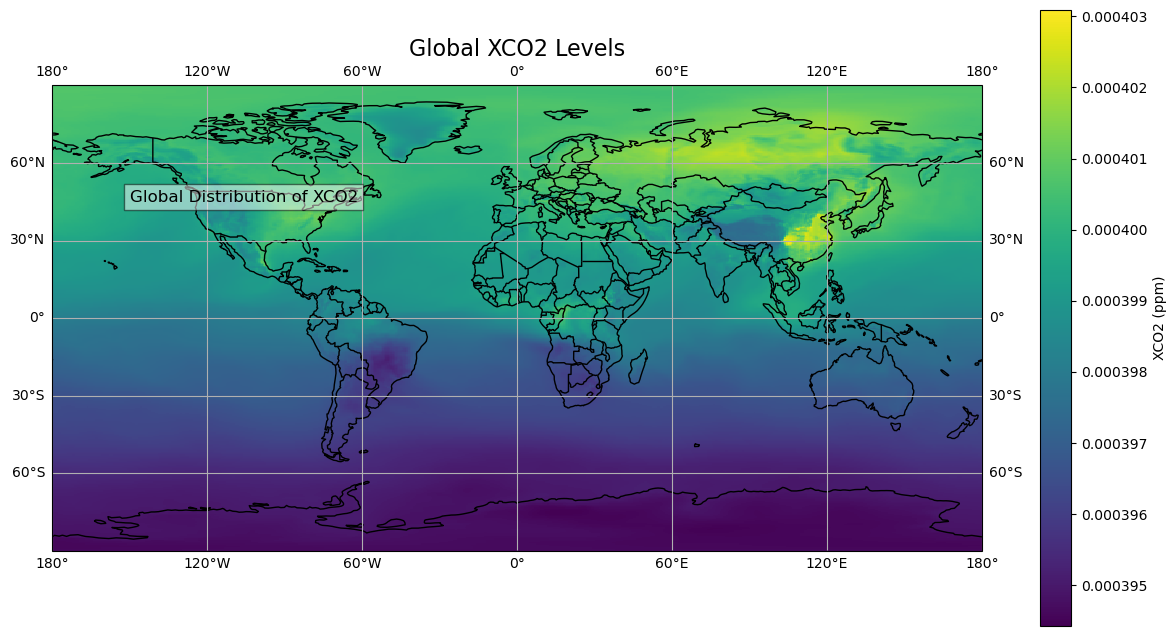

In [202]:
import xarray as xr
import matplotlib.pyplot as plt
import glob
import cartopy.crs as ccrs  
import cartopy.feature as cfeature  

# 读取数据
folder_path = 'D:/ESE5023/output_file'
files = glob.glob(f'{folder_path}/*.nc4')
ds = xr.open_mfdataset(files, combine='nested', concat_dim='time')

# 选择变量 XCO2  
variable = ds['XCO2'].isel(time=0)  # 选择第一个时间步骤  

#2.1
# 创建全局地图  
fig, ax = plt.subplots(figsize=(15, 8), subplot_kw={'projection': ccrs.PlateCarree()})  

# 添加地图特征  
ax.add_feature(cfeature.LAND)  
ax.add_feature(cfeature.COASTLINE)  
ax.add_feature(cfeature.BORDERS)  
ax.gridlines(draw_labels = True)

# 绘制变量  
pcm = variable.plot(ax=ax, cmap='viridis', add_colorbar=True, cbar_kwargs={'label': 'XCO2 (ppm)'})  

# 标题和标签  
ax.set_title('Global XCO2 Levels', fontsize=16)  
ax.set_xlabel('Longitude', fontsize=12)  
ax.set_ylabel('Latitude', fontsize=12)  

# 添加注释  
ax.text(-150, 45, 'Global Distribution of XCO2', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))  

plt.show()

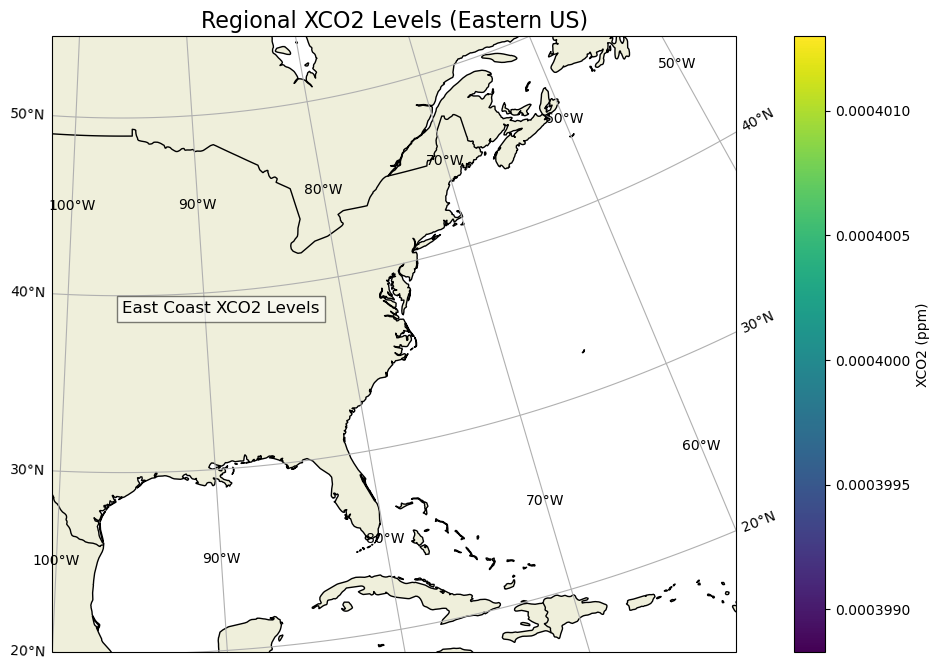

In [ ]:
#2.2
# BUG:未上色
# 创建区域地图  
fig, ax = plt.subplots(figsize=(15, 8), subplot_kw={'projection': ccrs.LambertConformal()})  
# 设置区域范围（美国东部） 
ax.set_extent([-100, -60, 20, 50], crs=ccrs.PlateCarree()) 

# 添加地图特征  
ax.add_feature(cfeature.LAND)  
ax.add_feature(cfeature.COASTLINE)  
ax.add_feature(cfeature.BORDERS)  

# 绘制变量  
pcm = variable.sel(lon=slice(-100, -60), lat=slice(20, 50)).plot(ax=ax, cmap='viridis', add_colorbar=True, cbar_kwargs={'label': 'XCO2 (ppm)'})  

# 标题和标签  
ax.set_title('Regional XCO2 Levels (Eastern US)', fontsize=16)  
ax.set_xlabel('Longitude', fontsize=12)  
ax.set_ylabel('Latitude', fontsize=12)  
ax.gridlines(draw_labels = True)

# 添加注释  
ax.text(-80, 30, 'East Coast XCO2 Levels', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))  

plt.show()